In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 78.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 54.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 78.2 MB/s eta 0:00:0

## Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
#Importing the libraries
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

2024-01-11 10:04:30.197634: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 10:04:30.261842: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 10:04:30.261895: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 10:04:30.263363: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 10:04:30.272111: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 10:04:30.272954: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
#Printing their versions
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {keras.__version__}")

Tensorflow Version 2.15.0
Keras Version 2.15.0


## Q2. Load the Wine Quality dataset and explore its dimensions. Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/79Aniket/79Aniket/main/wine.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


## Q3. Check for null values, identify categorical variables, and encode them.

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#Checking for duplicates
df.duplicated().sum()

240

In [7]:
#Shape of the dataset
df.shape

(1599, 12)

In [8]:
#Dropiping the duplicates
df = df.drop_duplicates(keep="first")
df.shape

(1359, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   object 
dtypes: float64(11), object(1)
memory usage: 138.0+ KB


In [10]:
#Checking unique values to perform encoding
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [11]:
values = {"bad" : 0, "good" : 1}

In [12]:
#Mapping values so we convert the categorical column to numerical
df['quality'] = df['quality'].map(values)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [13]:
#Checking class balance
df["quality"].value_counts()

1    719
0    640
Name: quality, dtype: int64

## Q4. Separate the features and target variables from the dataset.

In [14]:
#Dependent and Independent Variables
X = df.drop(labels=["quality"],axis=1)
y = df["quality"]

In [15]:
X.shape , y.shape

((1359, 11), (1359,))

## Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [16]:
#Performing train test split
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size= 0.20,random_state=42)
#Further Splitting train into train and validation data
X_train ,X_valid, y_train , y_valid = train_test_split(X_train,y_train,test_size= 0.20,random_state=42)

print(f"Training Data Shape : {X_train.shape , y_train.shape}")
print(f"Testing Data Shape : {X_test.shape , y_test.shape}")
print(f"Validation Data Shape : {X_valid.shape , y_valid.shape}")

Training Data Shape : ((869, 11), (869,))
Testing Data Shape : ((272, 11), (272,))
Validation Data Shape : ((218, 11), (218,))


In [17]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


## Q6. Scale the dataset using an appropriate scaling technique.

In [18]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [19]:
#We have 11 input features which will passed as input to our neural network first layer
X_train.shape[1:]

(11,)

## Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [21]:
#Creating our NEURAL Network Structure
from tensorflow.keras.layers import Input, Dense

LAYERS = [keras.layers.Input(shape=X_train.shape[1:],name="InputLayer"),
          keras.layers.Dense(500,activation='relu',name="HiddenLayer1"),
          keras.layers.Dense(250,activation='relu',name="HiddenLayer2"),
          keras.layers.Dense(100,activation='relu',name="HiddenLayer3"),
          keras.layers.Dense(1,activation='sigmoid',name="OutputLayer")
         ]

## Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [22]:
#Creating a Sequential Model using our defined our layers
model = keras.models.Sequential(LAYERS)

In [23]:
#Layers present in our NEURAL NETWORK
model.layers

## Q9. Print the summary of the model architecture.

In [24]:
#Summary of model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 500)               6000      
                                                                 
 HiddenLayer2 (Dense)        (None, 250)               125250    
                                                                 
 HiddenLayer3 (Dense)        (None, 100)               25100     
                                                                 
 OutputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 156451 (611.14 KB)
Trainable params: 156451 (611.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [25]:
#Defining our loss function,optimizer and metrics
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "Adam"
METRICS = ["accuracy"]

## Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [26]:
#Fitting our defined metrics in the model
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

## Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [27]:
#Setting batch size and number of epochs
batch_size = 31
epoch = 15


#Fitting the model to the training data without using callbacks
history = model.fit(X_train, y_train,
                    epochs=epoch,
                    batch_size=batch_size,
                    verbose =2,
                    validation_data=(X_valid, y_valid)

                        )

Epoch 1/15
29/29 - 1s - loss: 0.5832 - accuracy: 0.7077 - val_loss: 0.5206 - val_accuracy: 0.7294 - 1s/epoch - 46ms/step
Epoch 2/15
29/29 - 0s - loss: 0.5195 - accuracy: 0.7376 - val_loss: 0.5115 - val_accuracy: 0.7294 - 154ms/epoch - 5ms/step
Epoch 3/15
29/29 - 0s - loss: 0.5057 - accuracy: 0.7480 - val_loss: 0.5135 - val_accuracy: 0.7431 - 154ms/epoch - 5ms/step
Epoch 4/15
29/29 - 0s - loss: 0.4851 - accuracy: 0.7572 - val_loss: 0.5261 - val_accuracy: 0.7431 - 145ms/epoch - 5ms/step
Epoch 5/15
29/29 - 0s - loss: 0.4842 - accuracy: 0.7733 - val_loss: 0.5177 - val_accuracy: 0.7523 - 148ms/epoch - 5ms/step
Epoch 6/15
29/29 - 0s - loss: 0.4708 - accuracy: 0.7652 - val_loss: 0.5496 - val_accuracy: 0.7385 - 142ms/epoch - 5ms/step
Epoch 7/15
29/29 - 0s - loss: 0.4583 - accuracy: 0.7837 - val_loss: 0.5263 - val_accuracy: 0.7477 - 143ms/epoch - 5ms/step
Epoch 8/15
29/29 - 0s - loss: 0.4404 - accuracy: 0.7860 - val_loss: 0.5285 - val_accuracy: 0.7569 - 145ms/epoch - 5ms/step
Epoch 9/15
29/29 -

In [28]:
history.params

{'verbose': 2, 'epochs': 15, 'steps': 29}

In [30]:
#Setting the params for the callbacks
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

#Storing the setted params of callbacks in a list
CALLBACKS = [early_stopping_cb,early_stopping_cb,checkpoint_cb]


#Fitting the model to the training data with using callbacks
history_callbacks = model.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=batch_size,
                        validation_data=(X_valid, y_valid),
                        verbose = 2,
                        callbacks= CALLBACKS )

Epoch 1/15
29/29 - 0s - loss: 0.4108 - accuracy: 0.8067 - val_loss: 0.5526 - val_accuracy: 0.7431 - 228ms/epoch - 8ms/step
Epoch 2/15
29/29 - 0s - loss: 0.3585 - accuracy: 0.8435 - val_loss: 0.6125 - val_accuracy: 0.7339 - 145ms/epoch - 5ms/step
Epoch 3/15


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 - 0s - loss: 0.3642 - accuracy: 0.8331 - val_loss: 0.5846 - val_accuracy: 0.7339 - 163ms/epoch - 6ms/step


In [31]:
history_callbacks.params

{'verbose': 2, 'epochs': 15, 'steps': 29}

## Q13. Obtain the model's parameters (weights and biases).

In [33]:
#Acessing each layer
layer1 = model.layers[0]
layer2 = model.layers[1]
layer3 = model.layers[2]
layer4 = model.layers[3]
layer1.name , layer2.name , layer3.name , layer4.name

('HiddenLayer1', 'HiddenLayer2', 'HiddenLayer3', 'OutputLayer')

In [34]:
#Getting weights and biases of the first hidden layer and output layer
weights1 , biases1 = layer1.get_weights()
weights2 , biases2 = layer4.get_weights()

In [35]:
#Printing first hidden layer weights shape and first 5 weights
weights1.shape , weights1[:5]

((11, 500),
 array([[-5.27332798e-02,  2.04855204e-02,  5.21062966e-03, ...,
          8.24064482e-05, -3.65097052e-03,  9.83051732e-02],
        [ 9.61775035e-02,  1.10942200e-01,  1.13820560e-01, ...,
         -4.35701348e-02,  1.69488281e-01, -9.97130647e-02],
        [ 7.68758133e-02, -3.58933210e-02,  4.44905683e-02, ...,
          1.65543929e-02,  1.20782349e-02, -2.00161487e-02],
        [ 5.83238713e-02, -1.12175502e-01, -1.09690735e-02, ...,
         -4.87803062e-03, -2.97084190e-02,  5.45992143e-02],
        [-6.36212304e-02,  6.58002943e-02,  6.24703690e-02, ...,
          8.02050680e-02,  5.24713397e-02, -4.36606333e-02]], dtype=float32))

In [36]:
#Printing first hidden layer baises shape and first 5 baises
biases1.shape , biases1[:5]

((500,),
 array([-0.0454016 , -0.03850864, -0.00589377, -0.01907232, -0.01577676],
       dtype=float32))

In [37]:
#Printing output layer weights shape and first 5 weights
weights2.shape , weights2[:5]

((100, 1),
 array([[-0.14443025],
        [ 0.24022788],
        [ 0.23018223],
        [-0.09172979],
        [-0.24084511]], dtype=float32))

In [38]:
#Printing output layer biases shape and first 5 weights
biases2.shape , biases2[:5]

((1,), array([0.02420064], dtype=float32))

## Q14. Store the model's training history as a Pandas DataFrame.

In [39]:
#Storing model history before using callbacks in a dataframe
model_history_df = pd.DataFrame(history.history)
model_history_df

,loss,accuracy,val_loss,val_accuracy
0,0.583190,0.707710,0.520590,0.729358
1,0.519474,0.737629,0.511478,0.729358
2,0.505674,0.747986,0.513454,0.743119
3,0.485093,0.757192,0.526115,0.743119
4,0.484217,0.773303,0.517704,0.752294
5,0.470842,0.765247,0.549601,0.738532
6,0.458325,0.783659,0.526347,0.747706
7,0.440423,0.785961,0.528512,0.756881
8,0.435144,0.792865,0.533518,0.761468
9,0.423760,0.790564,0.568208,0.743119


In [40]:
#Storing model history after using callbacks in a dataframe

model_history_df_callbacks = pd.DataFrame(history_callbacks.history)
model_history_df_callbacks

,loss,accuracy,val_loss,val_accuracy
0,0.410784,0.806674,0.552579,0.743119
1,0.358479,0.843498,0.612527,0.733945
2,0.364157,0.833142,0.584642,0.733945


## Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

<AxesSubplot: >

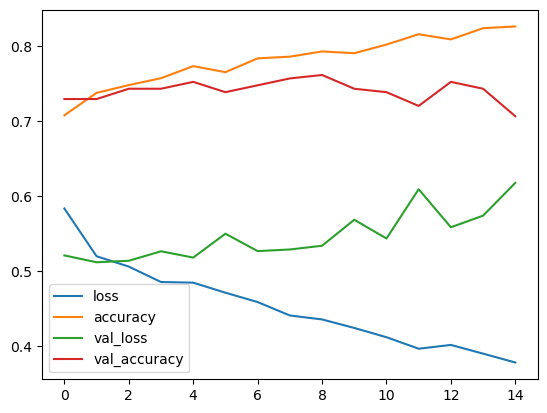

In [41]:
#Plot the model history before using callbacks
model_history_df.plot()

<AxesSubplot: >

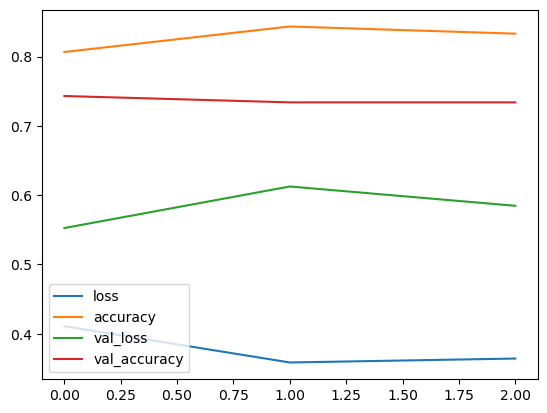

In [42]:
#Plot the model history after using callbacks
model_history_df_callbacks.plot()

## Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [43]:
#Evaluating the model performance after using callback functions
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.7059


[0.5445038080215454, 0.7058823704719543]

In [45]:
#To predict these values passing a sample of 10 values from the x_test
x_new = X_test[:10]

#The actual classes of these 10 samples passed
actual = y_test[:10]
actual


/tmp/ipykernel_567/3298957586.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  actual = y_test[:10]


55      0
1291    1
1544    1
593     0
1261    0
491     1
1004    0
889     0
1154    1
824     0
Name: quality, dtype: int64

In [46]:
#Probalities of the sample values passed
y_prob = model.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 102ms/step


array([[0.109],
       [0.938],
       [0.995],
       [0.112],
       [0.528],
       [0.995],
       [0.309],
       [0.089],
       [0.754],
       [0.275]], dtype=float32)

In [47]:
# Predict with threshold set as 0.5,if values have a probality greater than 05 they belong to class 1 else they belong to class 0
thr = 0.5
ypred = []
for i in y_prob:
    if i>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [48]:
list(actual)

[0, 1, 1, 0, 0, 1, 0, 0, 1, 0]

In [49]:
ypred

[0, 1, 1, 0, 1, 1, 0, 0, 1, 0]

In [50]:
#Evaluating the Model Performance
from sklearn.metrics import classification_report,confusion_matrix

y_prob = model.predict(X_test)

# Predict with threshold set as 0.5,if values have a probality greater than 05 they belong to class 1 else they belong to class 0
thr = 0.5
ypred = []
for i in y_prob:
    if i>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)

print(confusion_matrix(y_test,ypred))
print("=================================================")
print(classification_report(y_test,ypred))

9/9 [==============================] - 0s 2ms/step
[[98 37]
 [43 94]]
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       135
           1       0.72      0.69      0.70       137

    accuracy                           0.71       272
   macro avg       0.71      0.71      0.71       272
weighted avg       0.71      0.71      0.71       272

